## Non Linear Methods Training in R
***

In [1]:
require(ISLR)

Loading required package: ISLR


# Polynomials

In [6]:
poly.fit <- lm(wage ~ poly(age,4),data = Wage)
summary(poly.fit)


Call:
lm(formula = wage ~ poly(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


**Note:** Poly function does regressions by creating a basis of orthogonal polynomials which implies no correlation among variables. Columns are linear combinations of the original variables. 

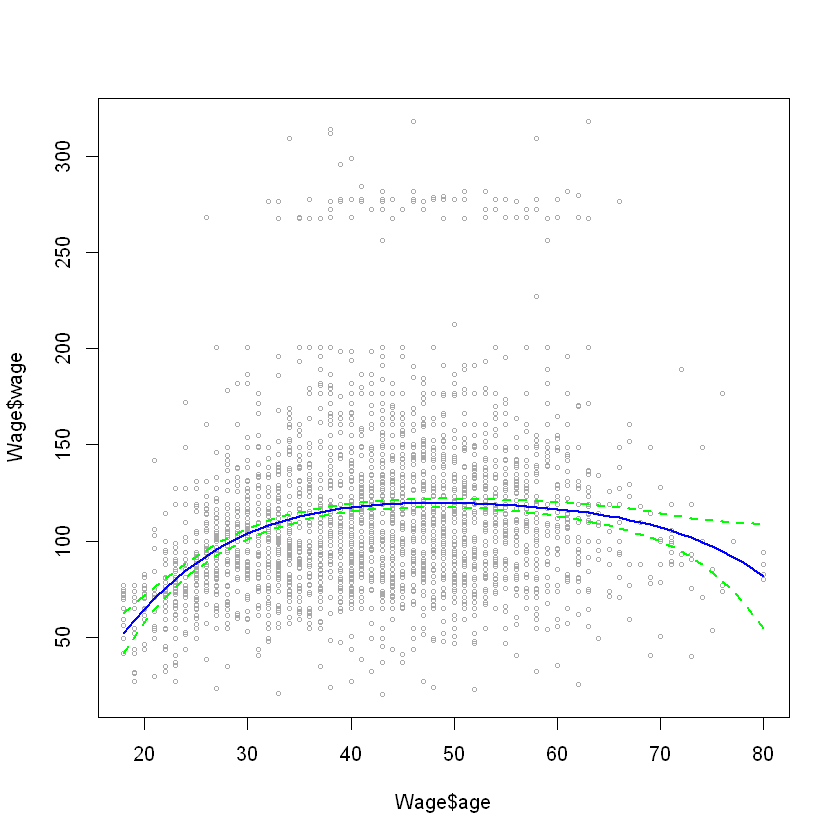

In [68]:
agelims <- range(Wage$age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(poly.fit,newdata = list(age = age.grid) ,se = TRUE)
se.bands <- cbind(preds$fit + 2*preds$se,preds$fit - 2*preds$se)
plot(Wage$age,Wage$wage, col = "darkgray",pch = 1, cex = 0.5) #data
lines(age.grid, preds$fit, lwd = 2, col = "blue") # Regression
matlines(age.grid,se.bands,col = "green", lwd = 2, lty = 2)

__Other methods to fit polynomial functions__

In [28]:
poly.fit2 <- lm(wage ~ age + I(age^2)+I(age^3)+I(age^4),data = Wage)
summary(poly.fit2)


Call:
lm(formula = wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.842e+02  6.004e+01  -3.067 0.002180 ** 
age          2.125e+01  5.887e+00   3.609 0.000312 ***
I(age^2)    -5.639e-01  2.061e-01  -2.736 0.006261 ** 
I(age^3)     6.811e-03  3.066e-03   2.221 0.026398 *  
I(age^4)    -3.204e-05  1.641e-05  -1.952 0.051039 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


Note: the basis to construct the model was different. hence the P-value are different however the fitted values are the same. 

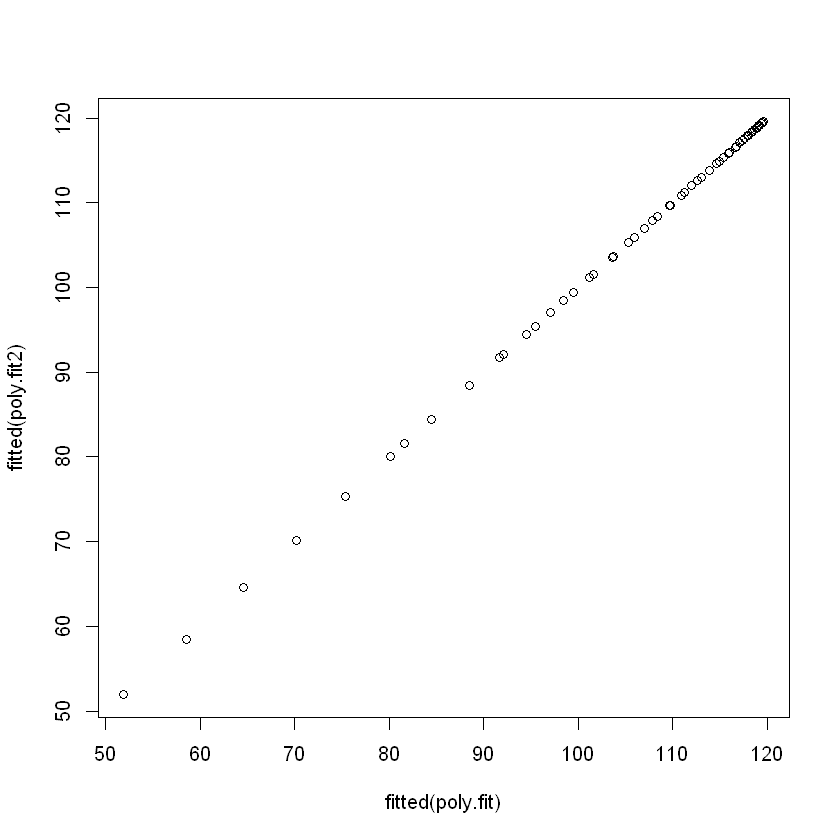

In [30]:
plot(fitted(poly.fit),fitted(poly.fit2))

By using orthogonal polynomials, each coefficient can be tested separately. However this method has its limitation. In general is necessary to use the anova() function to test each model.

In [34]:
modelA.fit <- lm(wage~education,data = Wage)
modelB.fit <- lm(wage~education+age,data = Wage)
modelC.fit <- lm(wage~education+poly(age,2),data = Wage)
modelD.fit <- lm(wage~education+poly(age,3),data = Wage)

anova(modelA.fit,modelB.fit,modelC.fit,modelD.fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2995,3995721,NA,NA,NA,NA
2994,3867992,1,127728.88,102.737760,9.215004e-24
2993,3725395,1,142597.10,114.696898,2.728971e-26
2992,3719809,1,5586.66,4.493588,3.410431e-02


__Polynomial logistic regression__

In [61]:
logit.fit <- glm(I(wage > 250) ~ poly(age,3),family = "binomial", data = Wage)
age.lims <- range(Wage$age)
age.grid <- seq(from = age.lims[1],to = age.lims[2])
logit.preds <- predict(logit.fit,newdata = list(age = age.grid),se = TRUE)
logit.se.bands <- logit.preds$fit + cbind(fit = 0, lower = -2*logit.preds$se,upper = 2*logit.preds$se)
head(logit.se.bands)

,fit,lower,upper
1,-7.664756,-10.759826,-4.569686
2,-7.324776,-10.106699,-4.542852
3,-7.001732,-9.492821,-4.510643
4,-6.695229,-8.917158,-4.473300
5,-6.404868,-8.378691,-4.431045
6,-6.130251,-7.876426,-4.384076


Calculation have been done in the logit scale, to obtain the probabilities we have to transform it back to the original scale.

$$ p = \frac{e^\eta}{1+e^\eta} $$

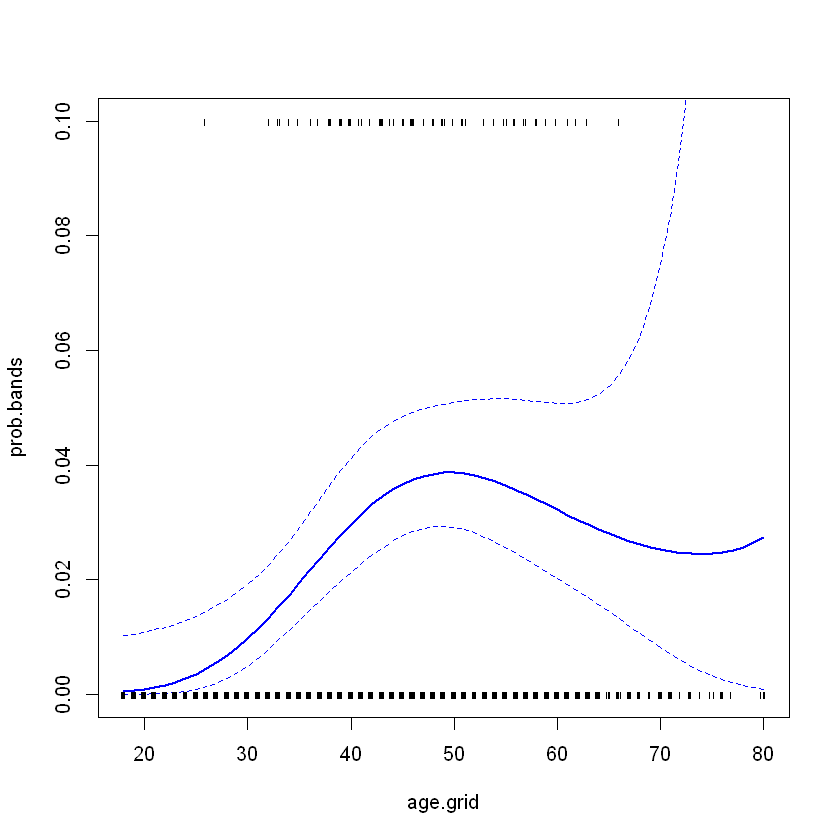

In [67]:
prob.bands = exp(logit.se.bands)/(1+exp(logit.se.bands))
matplot(age.grid,prob.bands,col = "blue", lwd = c(2,1,1),lty = c(1,2,2)
       ,type = "l",ylim = c(0,0.1))
points(jitter(Wage$age),I(Wage$wage>250)/10,pch = "l",cex = 0.5)